In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
prng = np.random.RandomState(seed=1234)

In [4]:
def fun(x):
    return np.exp(-np.log(x)**2/2)/x + np.abs(x-1.5)
    
x = np.linspace(0.1, 3, 1000)
y = fun(x)

xs = np.linspace(0.1, 3, 30)
mask = (xs > 2.0) & (xs < 2.5)
xs = xs[~mask]
ys = fun(xs) + 0.1*prng.randn(len(xs))

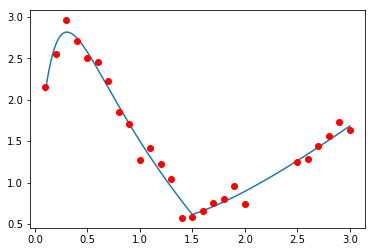

In [5]:
plt.plot(x, y)
plt.plot(xs, ys, 'ro')

pass

In [12]:
class GaussianProcess:

    def __init__(self, cov, sigma_noise=0.1):
        self._sigma = sigma_noise
        self._cov = cov
        self._L = None

    def fit(self, x, t):
        K = self._cov(xs, xs)
        In = np.eye(len(xs))

        self._L = np.linalg.cholesky(K + self._sigma**2*In)
        self._x = x
        self._t = t
        
    def _predict_one(self, x):
        if self._L is None:
            raise RuntimeError("Call fit() before calling predict()")
        
        u = np.linalg.solve(self._L, self._t)
        alpha = np.linalg.solve(self._L.T, u)
        k = cov(self._x, x)
        mu = np.dot(k, alpha)

        v = np.linalg.solve(self._L, k)
        sigma = cov(x, x) - np.dot(v, v)
        return mu, sigma
        
    def predict(self, x):
        x = np.atleast_1d(x)
        return np.array(list(map(self._predict_one, x)))

## Gaussian kernels

In [13]:
from scipy.spatial.distance import cdist

sigma0 = 1.0  # signal level
ell = 0.5  # length scale

def cov(x0, x1):
    """ Compute mutual-covariance matrix between ``x0`` and ``x1``.
    """
    x0 = np.atleast_1d(x0)
    x1 = np.atleast_1d(x1)
    D = cdist(x0[:, np.newaxis], x1[:, np.newaxis], metric='sqeuclidean')
    return np.squeeze(sigma0*np.exp(-D/ell**2/2))

In [14]:
process = GaussianProcess(cov=cov, sigma_noise=0.1)
process.fit(xs, ys)

In [15]:
xt = np.linspace(-1, 4, 200)
mu_t, sigma_t = process.predict(xt).T

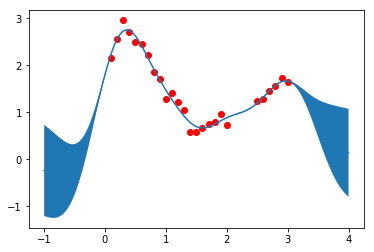

In [16]:
fig, ax = plt.subplots()

ax.plot(xs, ys, 'ro')
ax.fill_between(xt, mu_t - sigma_t, mu_t + sigma_t)
ax.plot(xt, mu_t)

pass

## Periodic kernels

In [36]:
xs = np.concatenate([np.linspace(0, 5, 10), np.linspace(7, 12, 10)])
ys = np.sin(xs) + 0.1*prng.randn(len(xs))

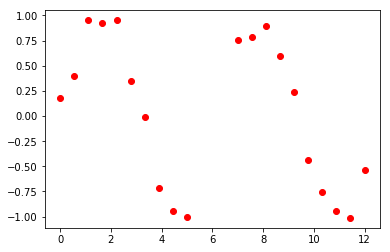

In [37]:
plt.plot(xs, ys, 'ro');

In [48]:
ell = 2*np.pi
r = 0.3

In [49]:
def cov(x0, x1):
    """ Compute mutual-covariance matrix between ``x0`` and ``x1``.
    """
    x0 = np.atleast_1d(x0)
    x1 = np.atleast_1d(x1)
    D = cdist(x0[:, np.newaxis], x1[:, np.newaxis], metric='minkowski', p=1.0)
    
    return np.squeeze(np.exp(-0.5*(np.sin(np.pi*D/ell)/r)**2))

In [59]:
process = GaussianProcess(cov=cov, sigma_noise=0.5)
process.fit(xs, ys)

In [60]:
xt = np.linspace(-2, 15, 200)
mu_t, sigma_t = process.predict(xt).T

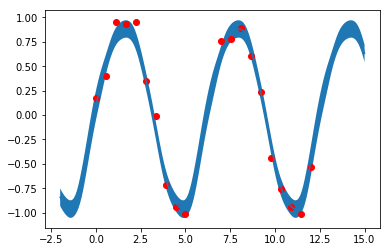

In [61]:
fig, ax = plt.subplots()

ax.plot(xs, ys, 'ro')
ax.fill_between(xt, mu_t - sigma_t, mu_t + sigma_t)
ax.plot(xt, mu_t)

pass